# Day 08. Exercise 04
# Regression

## 0. Imports

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [96]:
df = pd.read_csv("../data/checker_regression.csv")
df = df.groupby('uid').mean()
df.head()

,num_commits,pageviews,AVG(diff)
uid,,,
user_1,62.0,28.0,NaN
user_10,20.0,89.0,NaN
user_11,7.0,NaN,-2.0
user_12,86.0,NaN,-89.0
user_13,52.0,NaN,-48.5


In [98]:
df = df.fillna(0)
X = df[['num_commits', 'pageviews']]
y = df['AVG(diff)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, user_1 to user_8
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  29 non-null     float64
 1   pageviews    29 non-null     float64
 2   AVG(diff)    29 non-null     float64
dtypes: float64(3)
memory usage: 2.0+ KB


## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [100]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)

    rmse = []
    for train_ind, test_ind in kf.split(X):
        X_train, X_test = X.iloc[train_ind], X.iloc[test_ind]
        y_train, y_test = y.iloc[train_ind], y.iloc[test_ind]

        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
        train_acc = root_mean_squared_error(y_train, y_train_pred)
        test_acc = root_mean_squared_error(y_test, y_test_pred)
        rmse.append(test_acc)

        print(f"train -  {train_acc}  |   test -  {test_acc}")
    print(f"Average RMSE on crossval is {np.mean(rmse)}")

In [101]:
linreg = LinearRegression(fit_intercept=True)
crossval(5, X_train, y_train, linreg)

train -  48.9650182985128  |   test -  104.57142340670634
train -  67.12604324415598  |   test -  61.64346142808743
train -  66.61303918454013  |   test -  51.37782993510151
train -  62.66428544831268  |   test -  65.76577742150987
train -  64.32380789393129  |   test -  60.75794925163608
Average RMSE on crossval is 68.82328828860825


In [105]:
tree = DecisionTreeRegressor(max_depth=4, random_state=21)
crossval(5, X_train, y_train, tree)

train -  16.859486696417143  |   test -  73.72599307948015
train -  22.724489835232934  |   test -  9.08652849002302
train -  15.73045622626438  |   test -  52.18362024833293
train -  22.170791068615195  |   test -  38.92624436032842
train -  11.120689913492185  |   test -  53.51131451618433
Average RMSE on crossval is 45.48674013886976


In [115]:
rf = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=21)
crossval(5, X_train, y_train, rf)

train -  20.550977826680626  |   test -  77.24058483634003
train -  25.945612237216004  |   test -  6.862236075564636
train -  30.758762827384327  |   test -  49.77758584130189
train -  31.99883450552757  |   test -  37.27464677868331
train -  19.0821824692332  |   test -  50.91714603025851
Average RMSE on crossval is 44.41443991242968


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [116]:
linreg.fit(X_train, y_train)
y_linreg = linreg.predict(X_test)
root_mean_squared_error(y_test, y_linreg)

52.69818584468258

In [117]:
tree.fit(X_train, y_train)
y_tree = tree.predict(X_test)
root_mean_squared_error(y_test, y_tree)

103.03038229534978

In [118]:
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
root_mean_squared_error(y_test, y_rf)

82.91209637795443

In [119]:
def draw_plot(y_test, y_pred, model_name):
    
    plt.xticks(range(-200, 50, 25))
    
    plt.scatter(y_test, y_pred, c='c', marker="o")
    plt.xlabel("actual average diff")
    plt.ylabel("predicted average diff")
    plt.suptitle(f"predictions of {model_name}")
    plt.show()

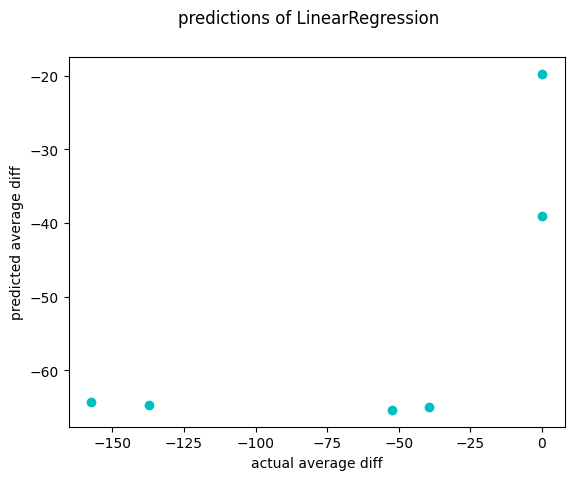

In [120]:
draw_plot(y_test, y_linreg, "LinearRegression")

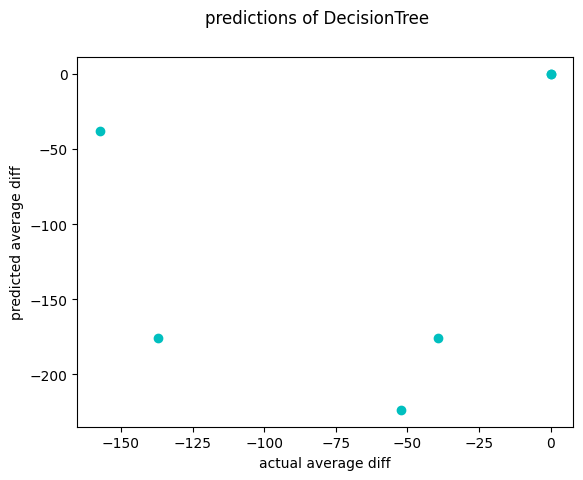

In [121]:
draw_plot(y_test, y_tree, "DecisionTree")

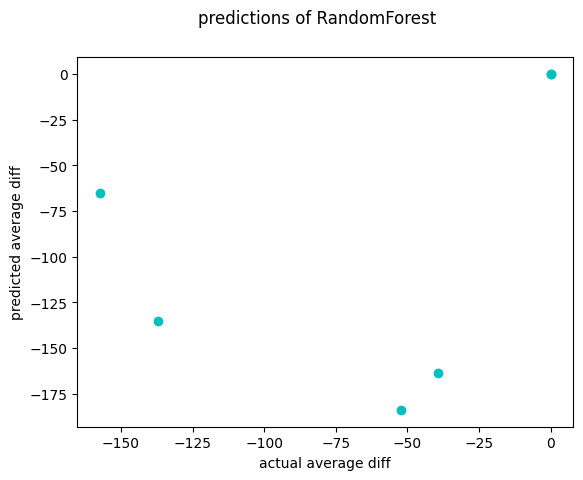

In [122]:
draw_plot(y_test, y_rf, "RandomForest")

в лучшем случае - диагональ